In [67]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train.shape

(891, 12)

In [70]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

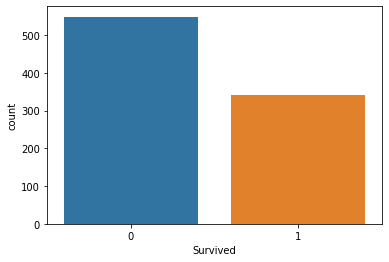

In [73]:
sns.countplot(x = 'Survived', data = train)

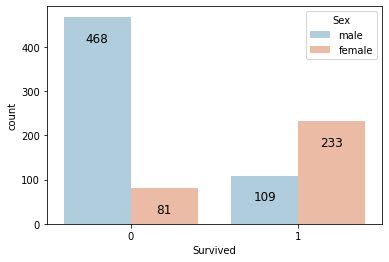

<Figure size 360x720 with 0 Axes>

In [74]:
ax = sns.countplot(x = 'Survived',hue = 'Sex', data = train, palette = 'RdBu_r')
#plt.text(x = train['Survived'],y= train['Survived']+10,  s = ‘{:.0f}’.format(height), # data label, formatted to ignore decimals ha = ‘center’))#
plt.figure(figsize = (5,10))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

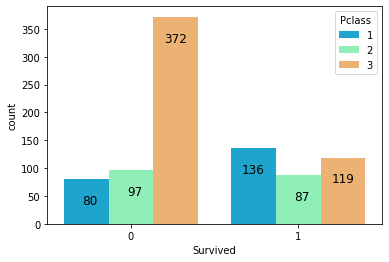

In [75]:
ax = sns.countplot(x = 'Survived',hue = 'Pclass', data = train, palette = 'rainbow')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='right', va='top', color='black', size=12)
plt.show()

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

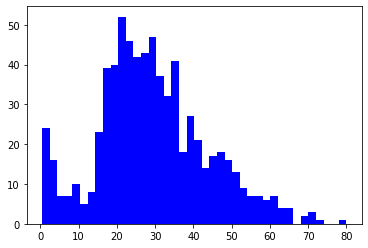

In [76]:
plt.hist(train['Age'].dropna(), histtype='bar', align='mid', orientation='vertical', color='blue',bins = 40)

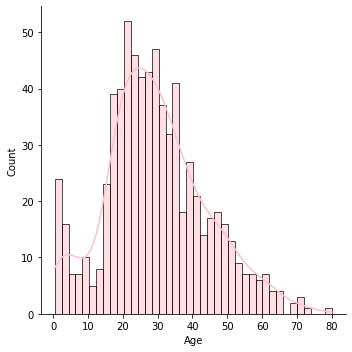

In [77]:
sns.displot(train['Age'].dropna(), kde = True, color='pink',bins = 40)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


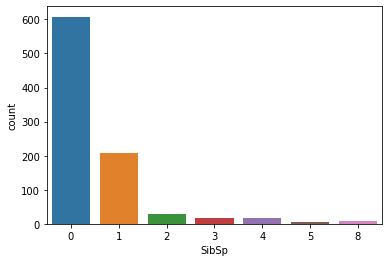

In [78]:
sns.countplot(train['SibSp'])

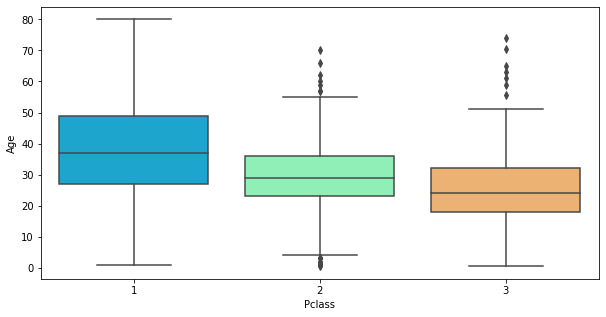

In [79]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'rainbow' )

In [80]:
def avg_age(nums):
  Age = nums[0]
  Pclass = nums[1]
  if pd.isnull(Age):
    
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24

  else:
    return Age

# Dealing with Null values

In [81]:
train['Age'] = train[['Age', 'Pclass']].apply(avg_age, axis = 1)

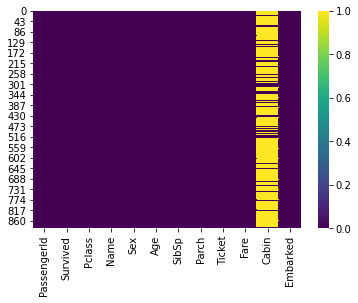

In [82]:
sns.heatmap(train.isnull(), cmap='viridis')

In [83]:
train.drop('Cabin', axis = 1, inplace = True)

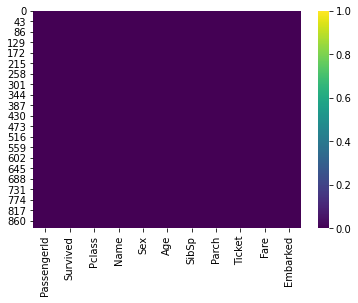

In [84]:
sns.heatmap(train.isnull(), cmap='viridis')

In [85]:
train.corr().Survived.sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.047255
Pclass        -0.338481
Name: Survived, dtype: float64

In [86]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [87]:
train.dropna(inplace = True)

In [88]:
train.shape

(889, 11)

In [89]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [90]:
Embarked = pd.get_dummies(train['Embarked'], drop_first=True)
Sex = pd.get_dummies(train['Sex'], drop_first=True)

In [91]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [92]:
train.drop(['Name', 'Embarked','Ticket','Sex'], axis = 1, inplace = True)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [94]:
train = pd.concat([train, Sex,Embarked], axis = 1 )
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Train Test Split of the data

In [95]:
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test =   train_test_split(X, y,test_size = 0.3, random_state = 101)

# Logistic Regression Model

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
prediction = l_model.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_test, prediction)

array([[149,  14],
       [ 39,  65]])

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(y_test, prediction)

0.8014981273408239

# Evaluavation of the Model

In [106]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

